# Проект - Основы машинного обучения

### Описание проекта и загрузка данных

     Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. 
     Распространённая проблема фитнес-клубов и других сервисов — отток клиентов.
     Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 
      Наша задача — провести анализ и подготовить план действий по удержанию клиентов. 
     А именно: 
    •	научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
    •	сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
    •	проанализировать основные признаки, наиболее сильно влияющие на отток;
    •	сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами: 
     o	1) выделить целевые группы клиентов;
     o	2) предложить меры по снижению оттока;
     o	3) определить другие особенности взаимодействия с клиентами.
  
  
      Набор данных включает следующие поля:
      
    •	Данные клиента за предыдущий до проверки факта оттока месяц: 
    o	'gender' — пол;
    o	'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    o	'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    o	Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    o	'Phone' — наличие контактного телефона;
    o	'Age' — возраст;
    o	'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
    •	Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента: 
    o	'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    o	'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    o	'Group_visits' — факт посещения групповых занятий;
    o	'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    o	'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    o	'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
    •	'Churn' — факт оттока в текущем месяце.


In [1]:
#Загружаем библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import itertools
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from IPython.display import display



In [2]:
df = pd.read_csv('/datasets/....csv')# прочитаем файл

### Исследовательский анализ данных EDA

Посмотрим информацию о данных,который содержит датасет.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
df.head()# выведем первые 5 строк

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Проверим наличие пропусков в датасете.

In [6]:
df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Вывод- пропуски в датасете отсутствуют и все данные числовые.

Построим гистограммы и посмотрим как распределены признаки.

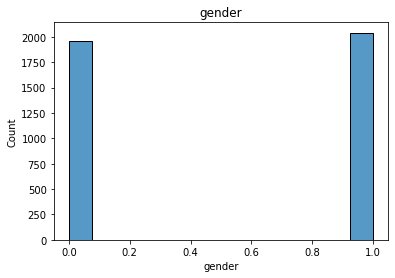

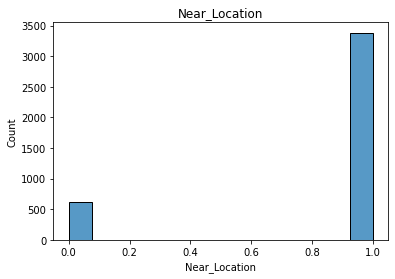

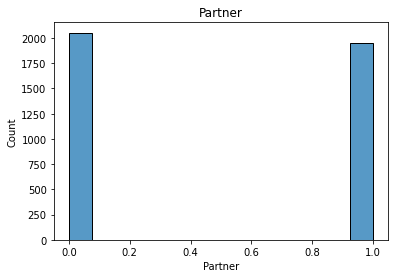

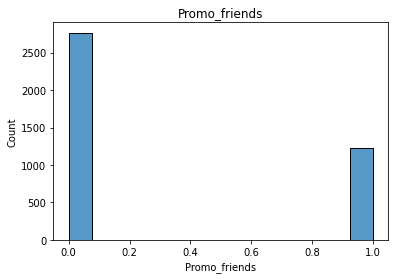

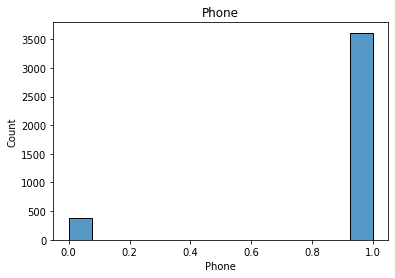

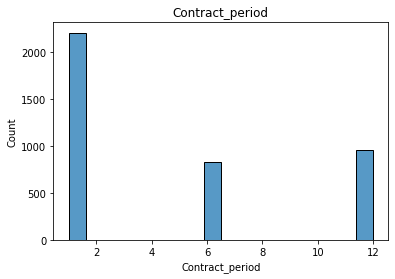

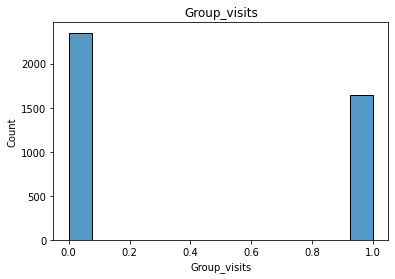

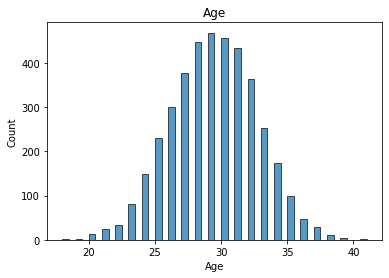

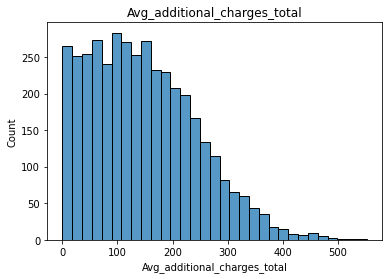

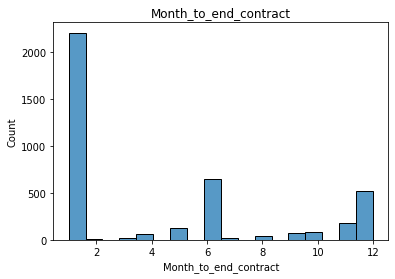

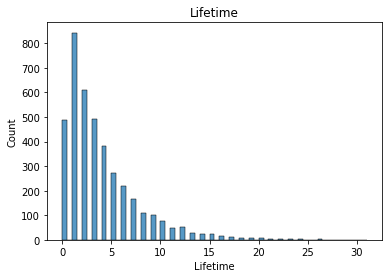

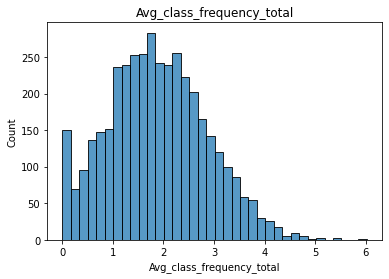

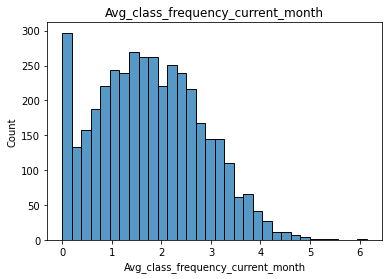

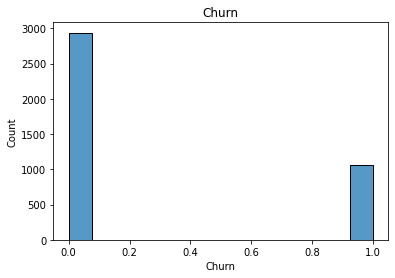

In [7]:
for col in df.columns:
    sns.histplot(x=df[col])
    plt.title(col)
    plt.show()

Построим гистограммы распределения признаков для пользователей,кто ушел в отток и для тех, кто остался.

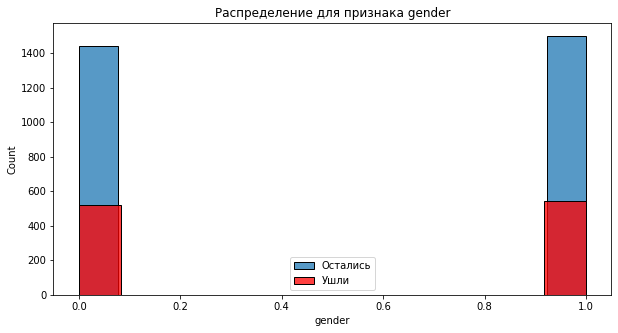

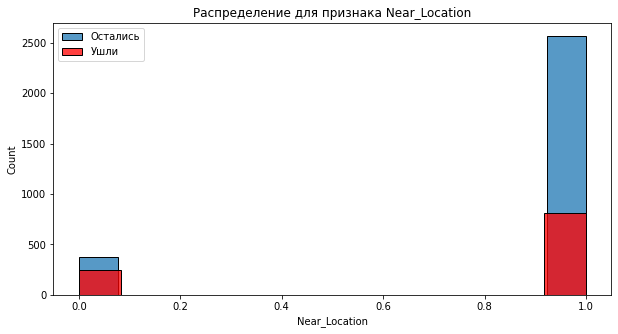

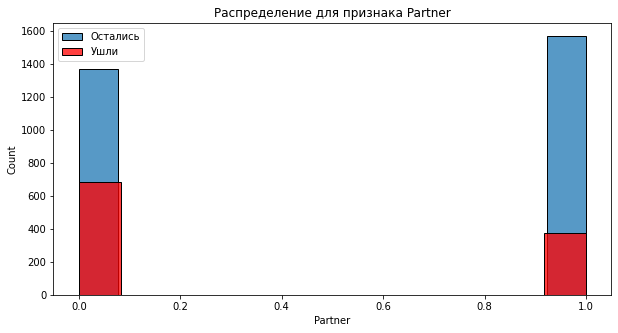

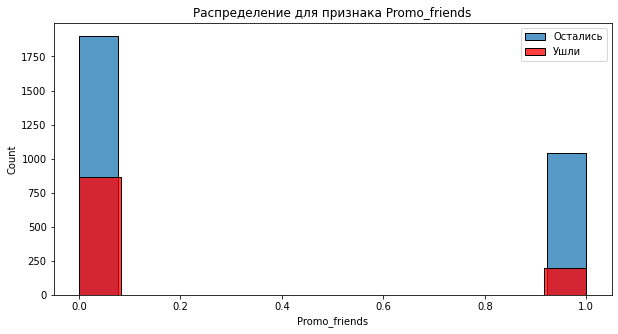

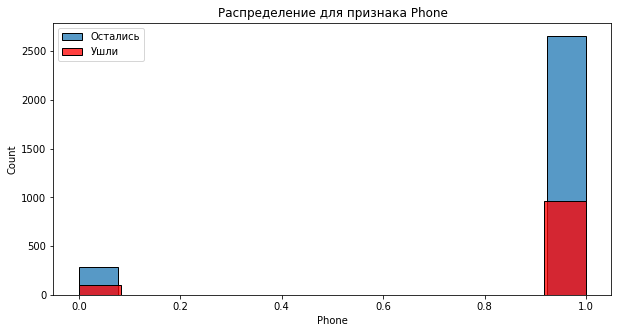

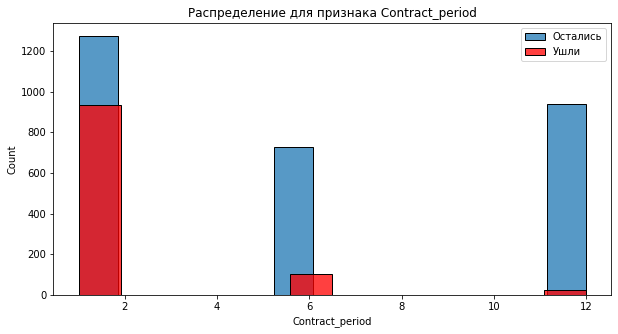

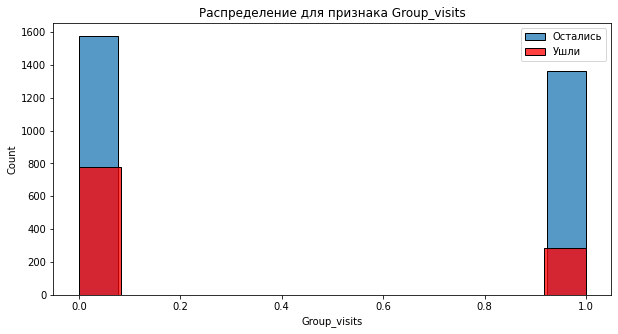

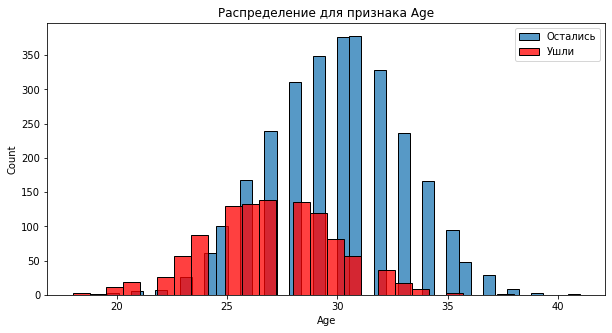

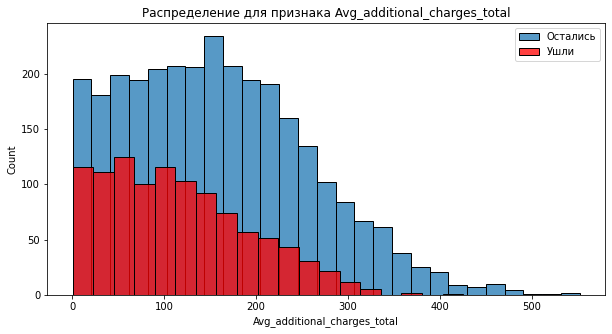

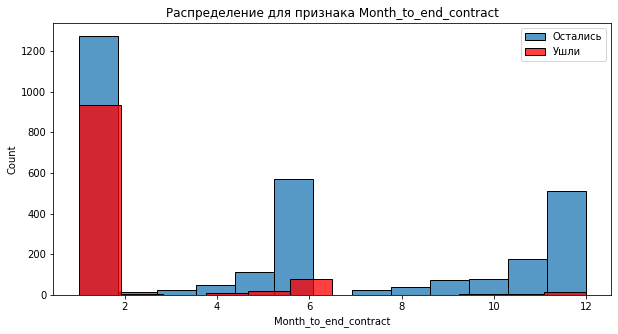

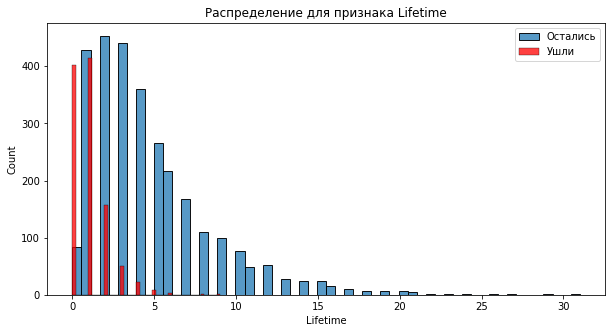

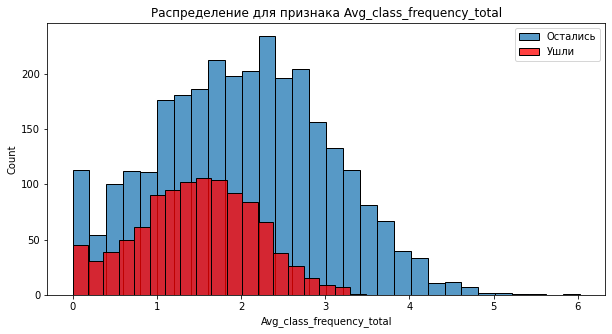

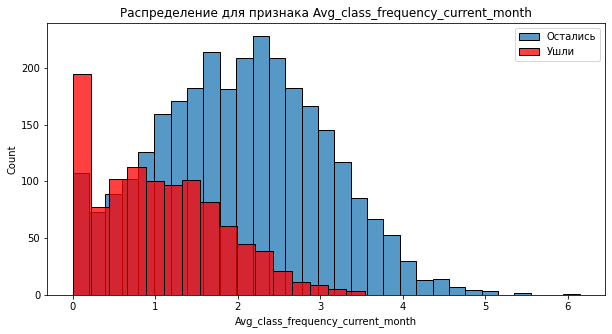

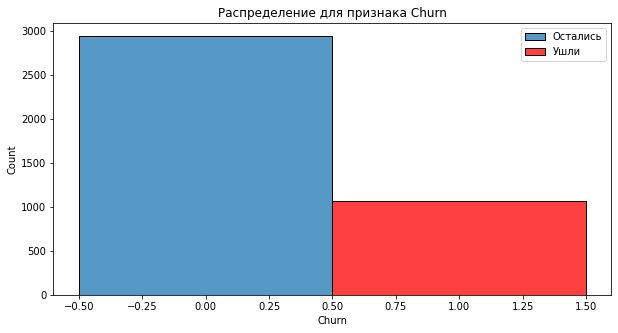

In [8]:
import warnings
warnings.filterwarnings('ignore') #убираем предупреждение python

for col in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df.query('Churn==0')[col])
    sns.histplot(df.query('Churn!=0')[col], color = 'r')
    plt.legend(labels = ('Остались', 'Ушли'))
    plt.title('Распределение для признака ' + col)
    plt.show()

Из графика видно, что клиенты, который ушли имеют возраст от 20 до 30 лет, при этом большинство из них в возрасте от 25 до 30 лет. По распределению признака Lifetime(время с момента первого обращения в фитнес-центр) для тех,кто ушел,можно заметить,что период охлаждения составляет 2 месяца, в третьем месяце происходит отток.

Посчитаем матрицу корреляций и изобразим в виде тепловой карты.

In [10]:
cm=df.corr()

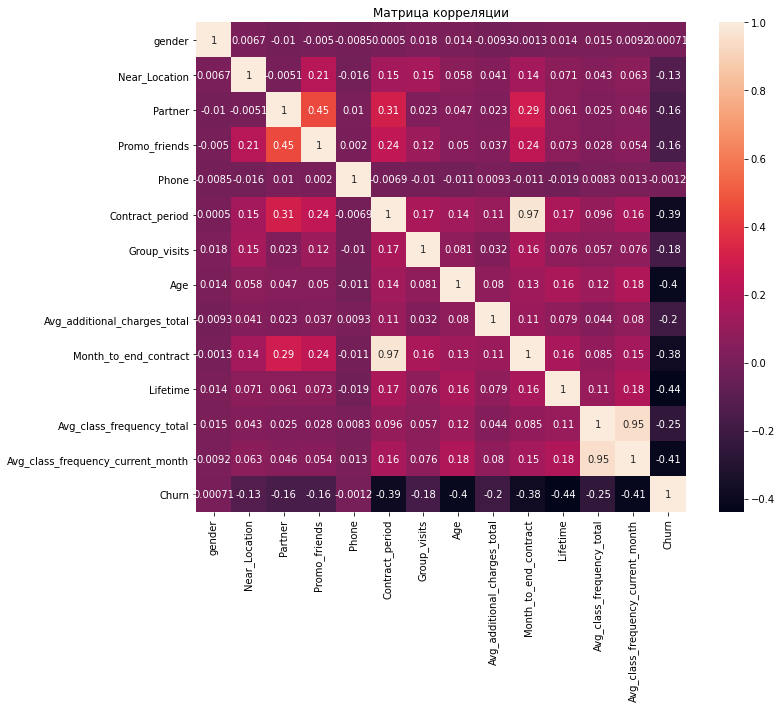

In [11]:
plt.figure(figsize=(12,9))
sns.heatmap(cm, annot=True, square=True)
plt.title('Матрица корреляции')
plt.show()

     Матрица корреляции показывает нам взамосвязь признаков с целевой переменной,т.е оттока пользователей.                Чем ближе коэффициент к 1 , тем сильнее взаимосвязь признаков.
      Из матрицы видно, что признак 'Contract_period' сильно коррелирует с признаком 'Month_to_end_contract' - коэффициент составляет 0.97. Также заметно ,что признаки 'Partner' и 'Promo_friends ' взаимосвязаны между собой коэффициент корреляции составляет 0.45.
    Из матрицы корреляции очень заметно и отрицательную взамосвязь между признаками и оттоком клиентов.

### Модель прогнозирования оттока клиентов

In [12]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0) 

#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()

X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки


Проверим размеры выборок, правильно ли прошло разделение.

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 1161 to 2732
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             3200 non-null   int64  
 1   Near_Location                      3200 non-null   int64  
 2   Partner                            3200 non-null   int64  
 3   Promo_friends                      3200 non-null   int64  
 4   Phone                              3200 non-null   int64  
 5   Contract_period                    3200 non-null   int64  
 6   Group_visits                       3200 non-null   int64  
 7   Age                                3200 non-null   int64  
 8   Avg_additional_charges_total       3200 non-null   float64
 9   Month_to_end_contract              3200 non-null   float64
 10  Lifetime                           3200 non-null   int64  
 11  Avg_class_frequency_total          3200 non-null   fl

In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 2230 to 299
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             800 non-null    int64  
 1   Near_Location                      800 non-null    int64  
 2   Partner                            800 non-null    int64  
 3   Promo_friends                      800 non-null    int64  
 4   Phone                              800 non-null    int64  
 5   Contract_period                    800 non-null    int64  
 6   Group_visits                       800 non-null    int64  
 7   Age                                800 non-null    int64  
 8   Avg_additional_charges_total       800 non-null    float64
 9   Month_to_end_contract              800 non-null    float64
 10  Lifetime                           800 non-null    int64  
 11  Avg_class_frequency_total          800 non-null    floa

Метод info показывает, что разделение сделано верно.

Обучим нашу модель логистической регрессией.

In [15]:
X_test_st = scaler.transform(X_test)
X_train_st = scaler.transform(X_train)

In [16]:
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

In [17]:
# выведem все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score (y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test,lr_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, lr_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predictions)))

Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84


Обучим нашу модель методом случайного леса.

In [18]:
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0) 
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions= rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

In [19]:
# выведем все изученные метрики для полученного прогноза
print('Accuracy: {:.2f}'.format(accuracy_score (y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test,rf_predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test,rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test,rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83


Если сравнивать модели по данным показателям, то модель,обученная методом случайного леса проявила себя лучше.

### Кластеризация клиентов

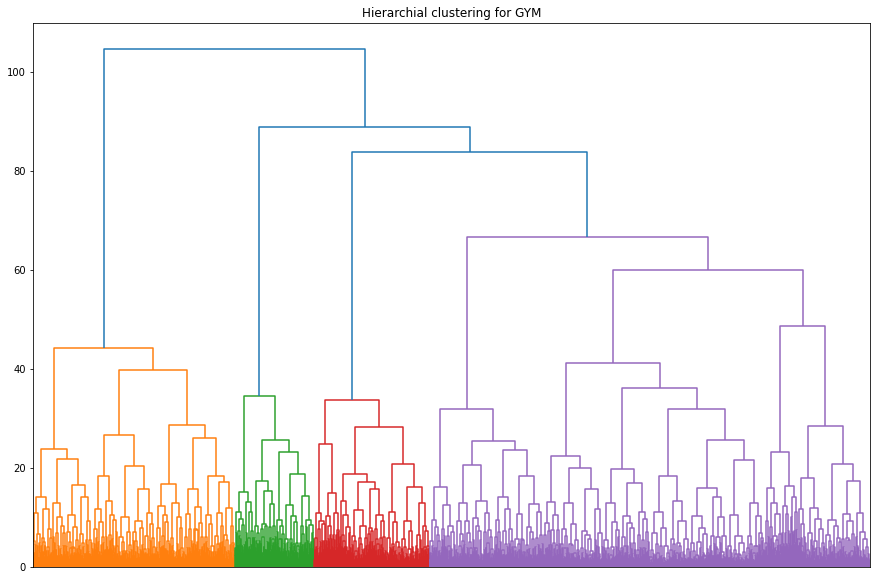

In [20]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

#Визуализируем дендрограмму
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top',no_labels=True)
plt.title('Hierarchial clustering for GYM')
plt.show() 

На дендограмме можно увидеть 5 кластеров.

In [21]:
# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
clusters = df.groupby(['cluster_km']).mean()
clusters

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


     Из средних значений можно понять типичный портрет клиента
     - средний возраст пользователей фитнес центра- от 28 до 30 лет,
     - почти равное распределение по половому признаку,
     - большую долю занимают клиенты- сотрудники компании-партнёра клуба. 

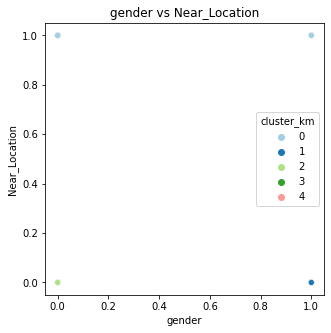

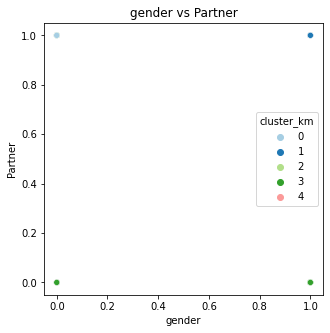

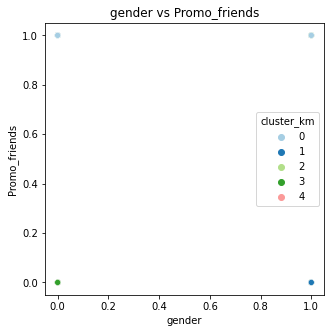

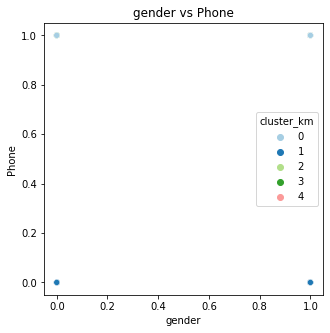

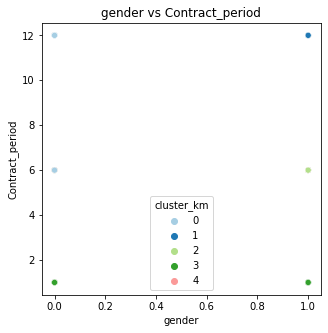

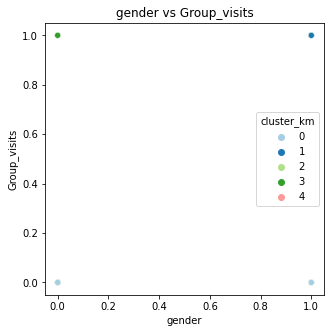

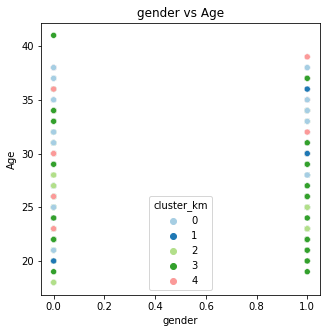

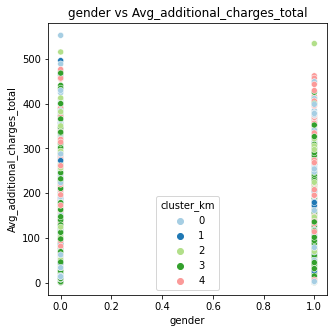

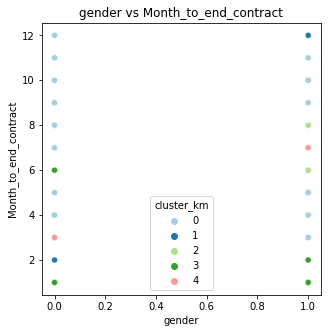

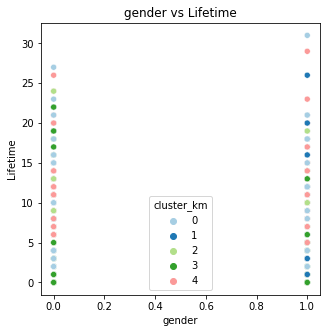

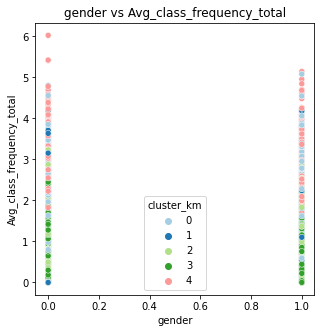

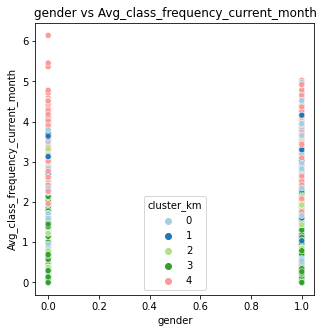

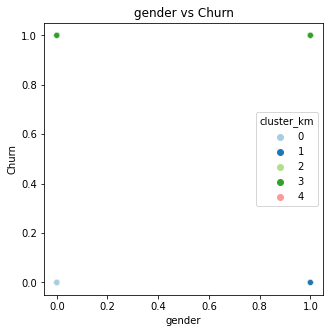

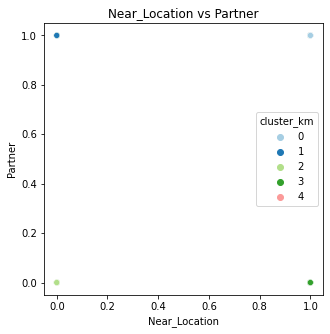

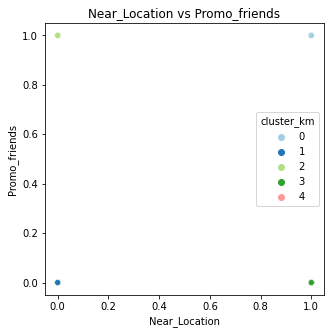

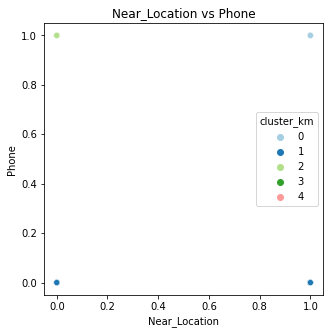

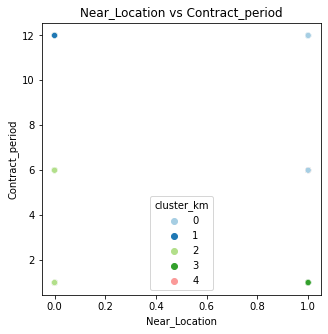

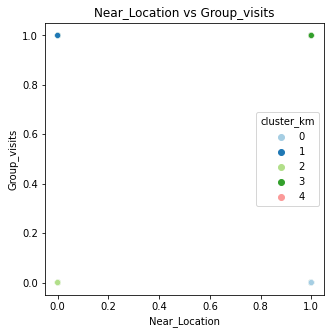

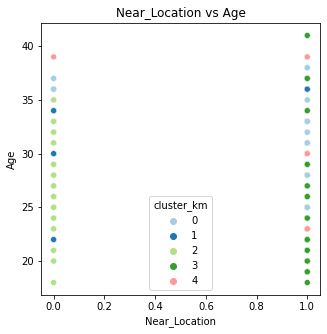

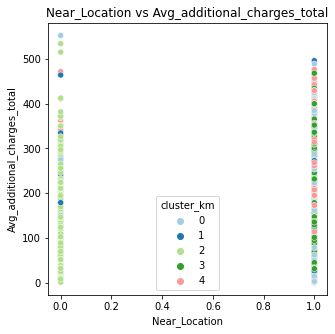

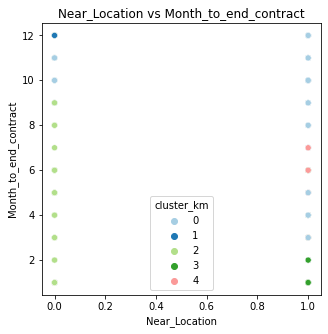

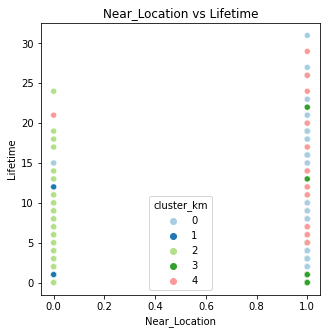

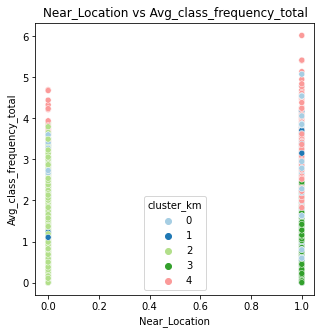

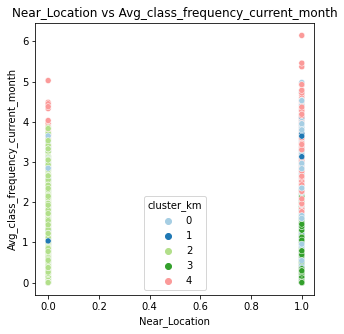

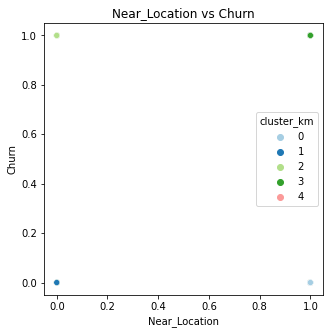

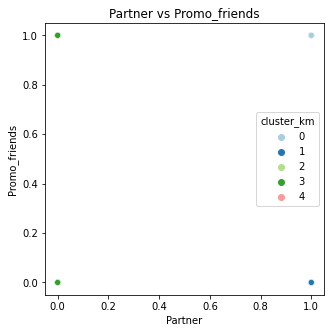

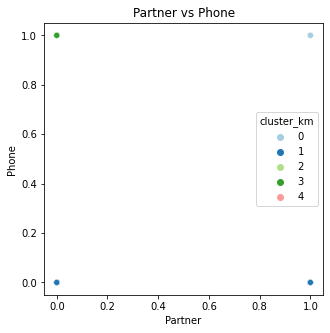

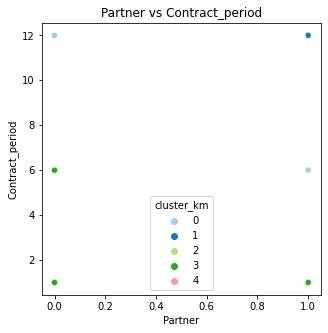

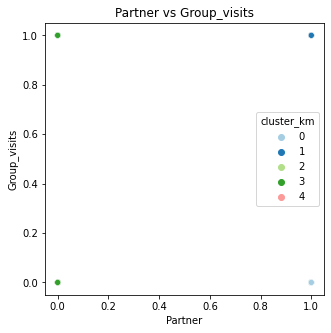

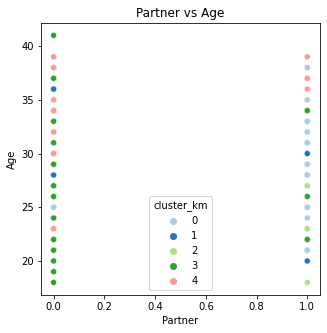

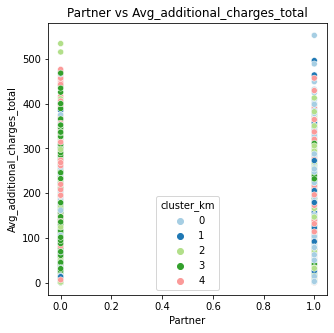

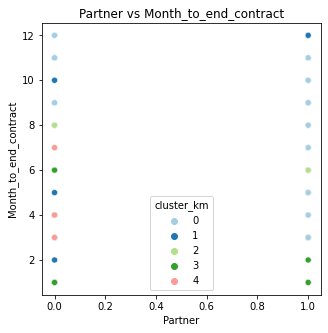

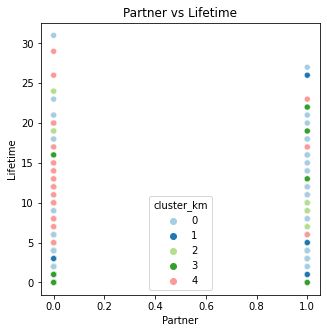

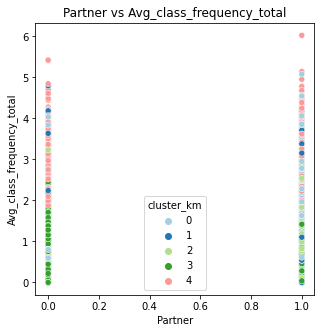

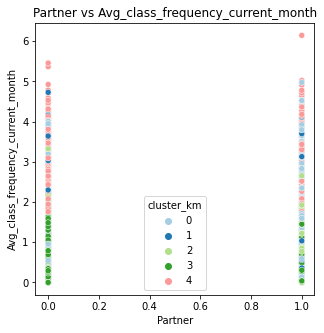

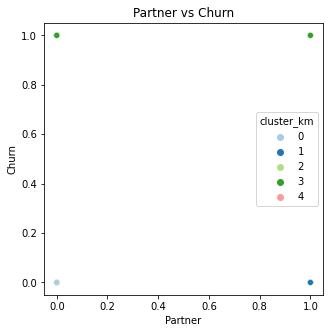

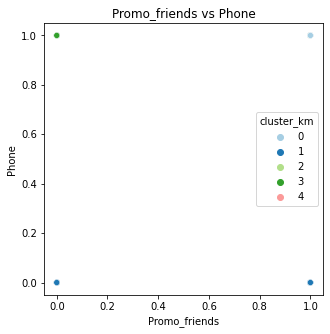

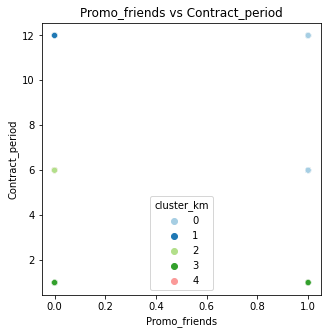

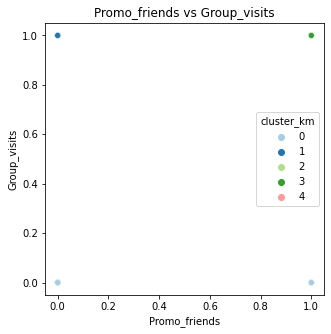

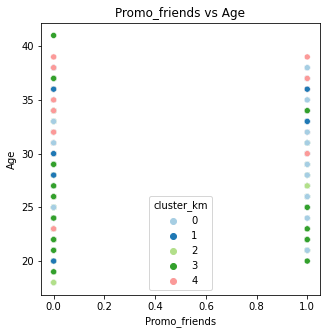

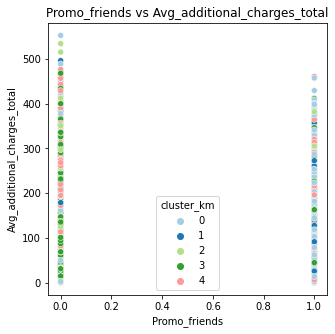

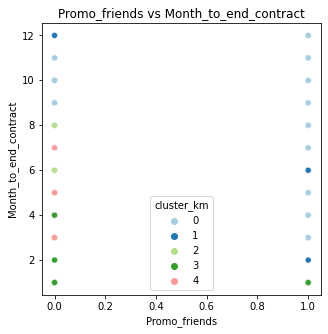

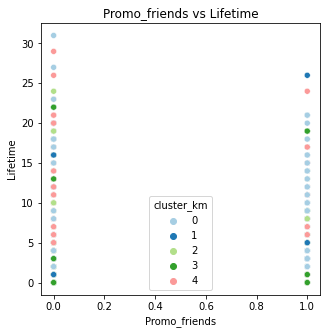

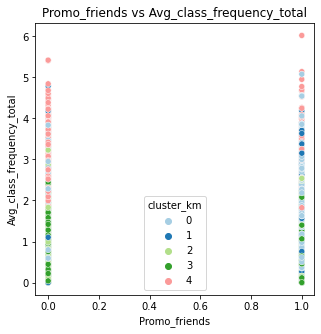

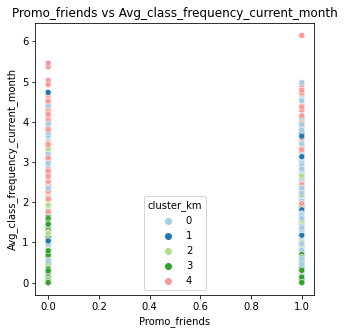

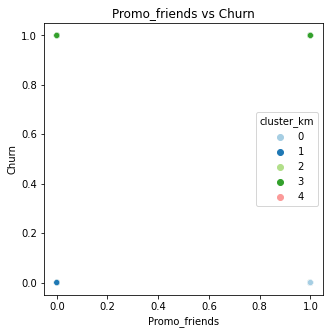

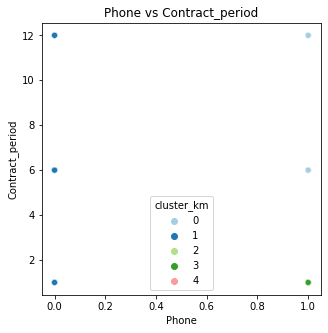

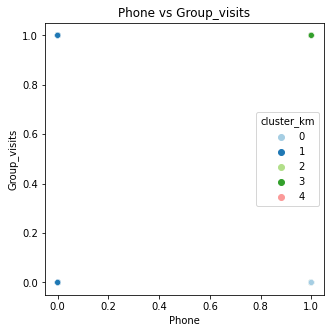

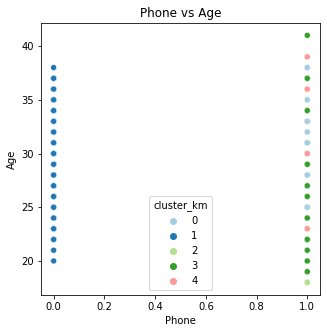

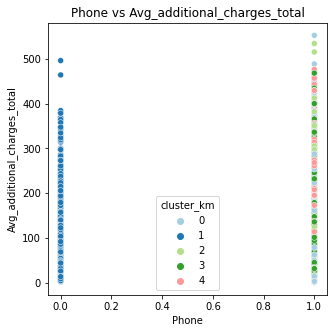

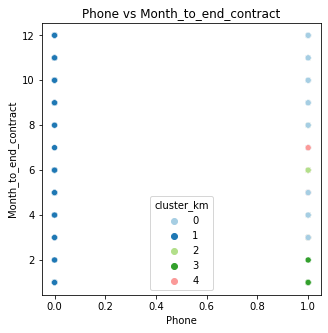

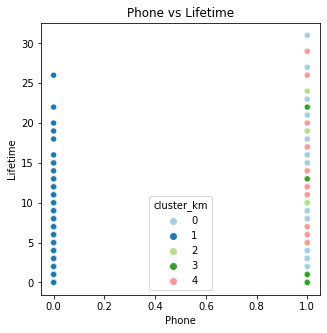

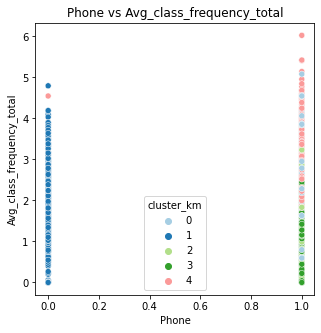

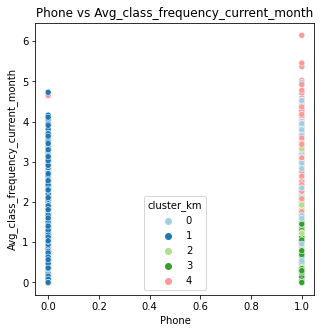

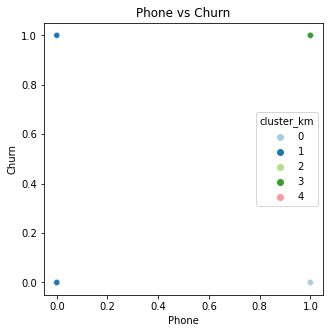

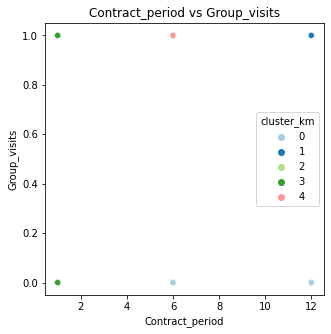

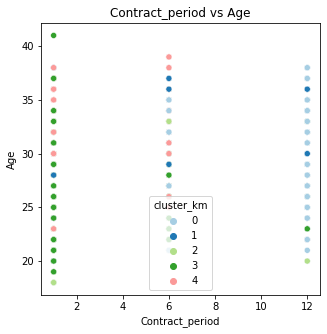

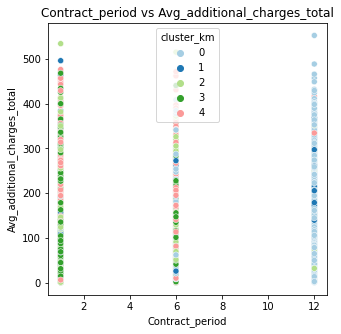

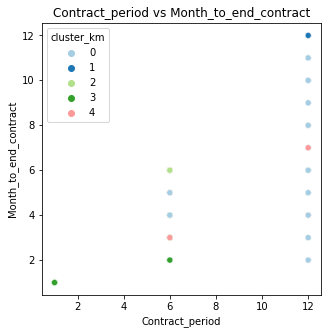

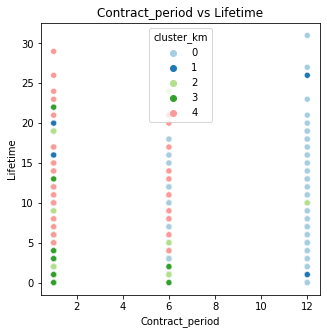

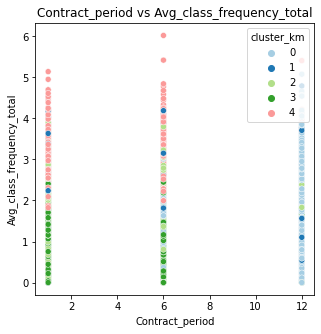

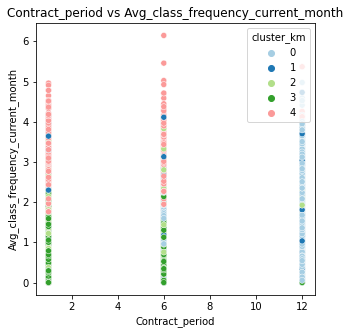

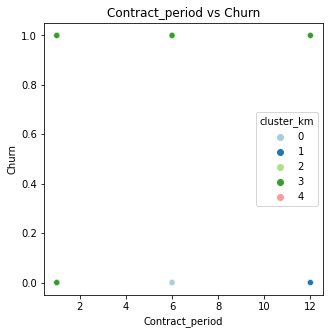

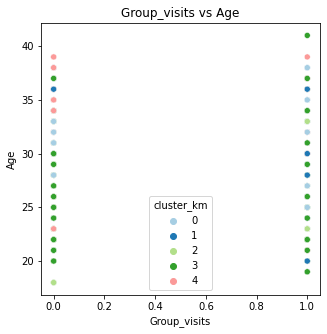

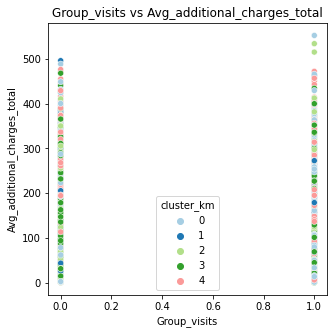

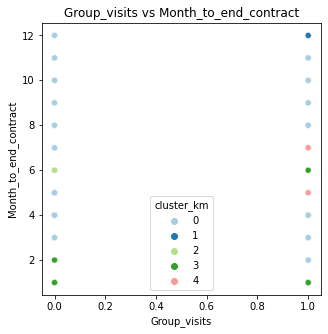

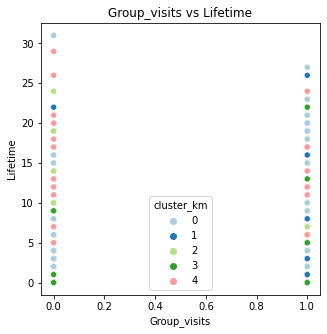

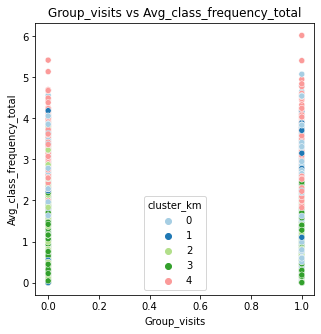

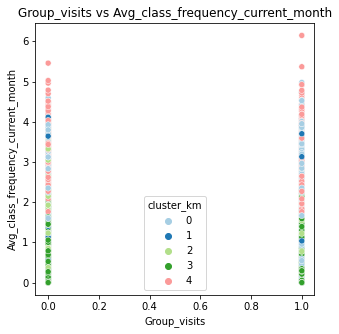

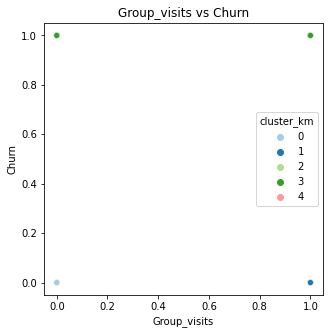

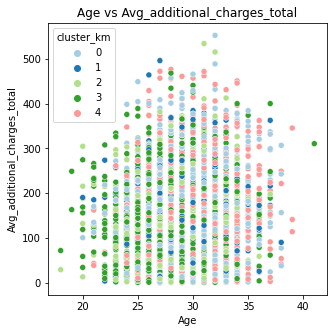

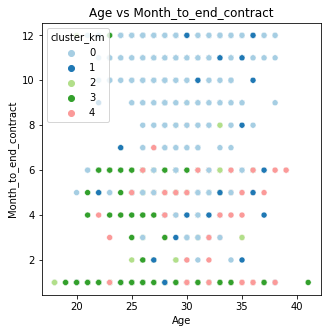

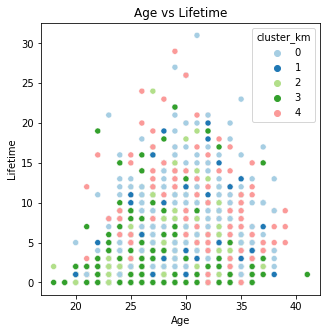

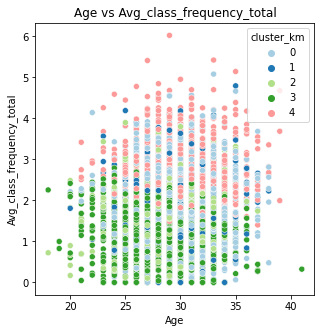

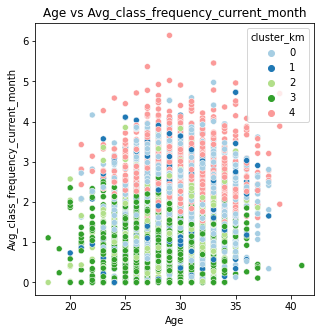

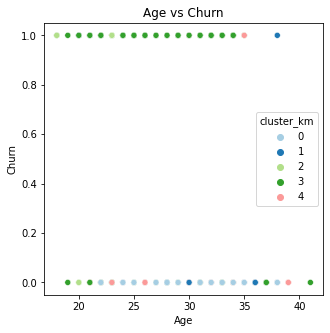

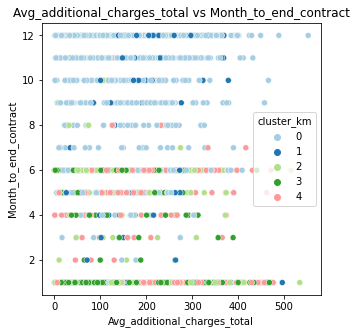

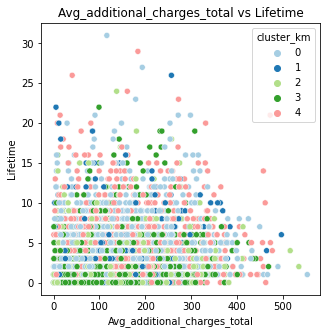

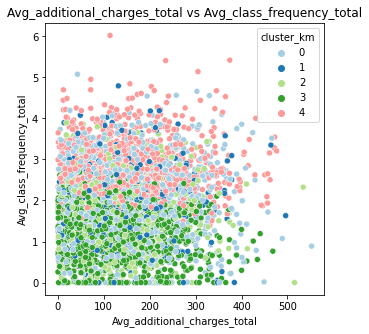

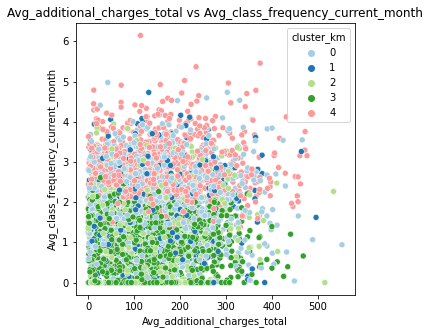

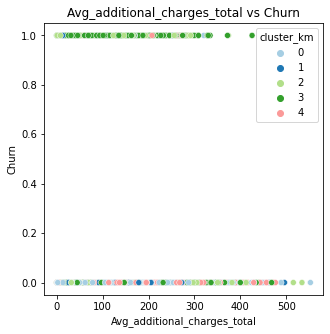

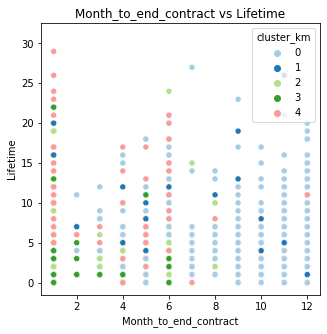

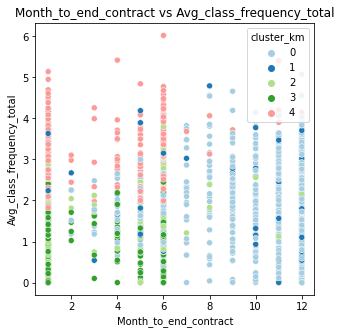

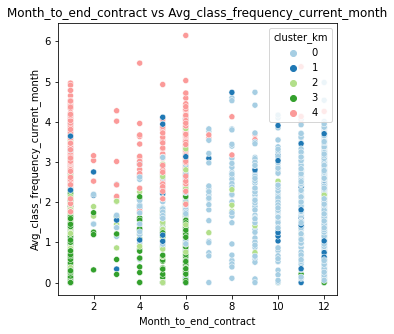

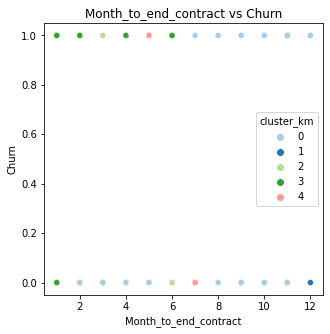

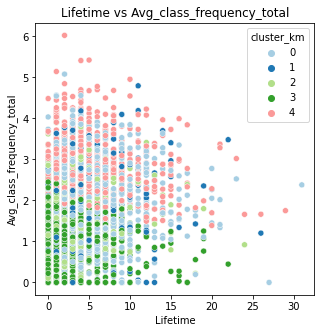

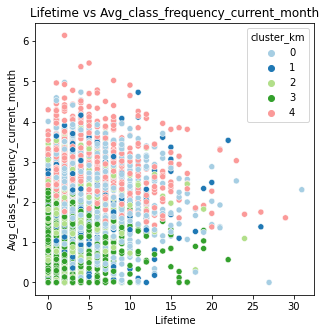

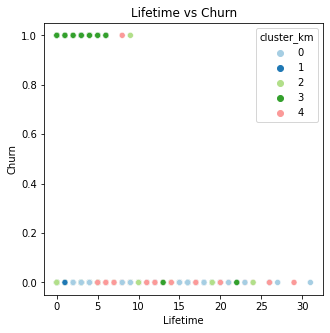

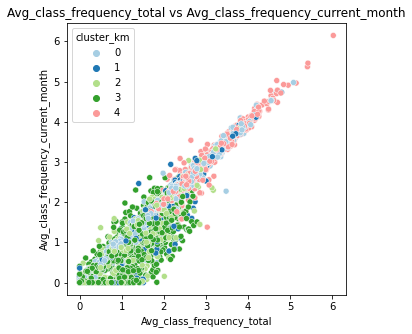

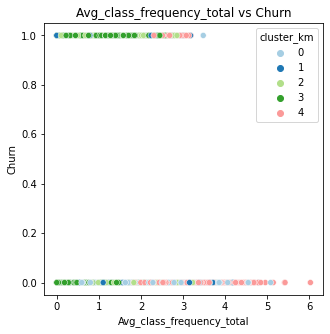

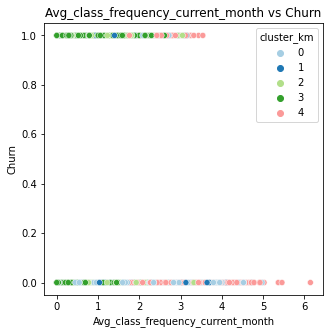

In [22]:
# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(itertools.combinations(df.drop('cluster_km', axis=1).columns, 2))
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()
for pair in col_pairs:
    show_clusters_on_plot(df, pair[0], pair[1], 'cluster_km');

Из данных графиков видно, распределение признаков по кластерам.

Посчитаем долю оттока для каждого полученного кластера.

In [23]:
df.groupby('cluster_km')['Churn'].mean()
    
    

cluster_km
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: Churn, dtype: float64

Виализируем расчет доли оттока для каждого кластера. Построим столбчатую диаграмму.

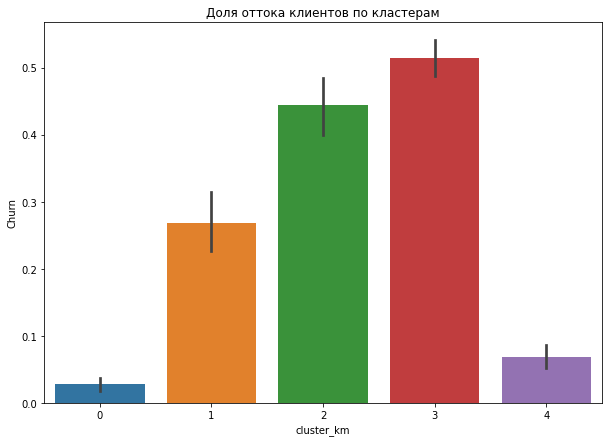

In [24]:
plt.figure(figsize=(10, 7))
sns.barplot(y='Churn', x='cluster_km', data=df)
plt.title('Доля оттока клиентов по кластерам')
plt.show;


Наибольшая доля оттока у 3 кластера 0.51 и 2 кластера 0.44.  Наименьшая доля оттока у 0 и 4 кластера- 0.02 и 0.06 соответственно.


### Выводы и рекомендации в работе с клиентами

     В данном исследовании проведен анализ данных пользователького поведения.
     Сформирована модель прогнозирования оттока клиентов. Выделены 5 кластеров пользователей.
          Сформирован типичный портрет клиента:
-  средний возраст пользователей фитнес центра- от 28 до 30 лет,
-  почти равное соотношение мужчин и женщин,
-  большую долю занимают клиенты- сотрудники компании-партнёра клуба.

       Выявлены кластеры,в которых наибольшая доля оттока клиентов- это второй и третий.
       
       Анализируя средние значения по признакам данных кластеров,можно сделать вывод,что сильно влияют на отток клиентов следующие признаки- Lifetime,Partner,Group_visits.
       Среднее время с момента первого обращения в фитнес-центр (Lifetime) в 2 и 3 кластере составляет 2.44 и 2.8 месяцев. Доля клиентов из компаний партнеров(Partner) 0.46 и 0.35 соответственно. Значит нужно увеличивать эту долю, путем проведения презентации и улучшения системы лояльности в компаниях партнерах.
       Факт посещения групповых занятий(Group_visits) в кластерах 2 и 3 тоже значительно меньше,чем в других кластерах- 0.21 и 0.34 соответственно.Тоже говорит о том, что нужно привлекать клиентов на групповые занятия,например, по йоге или аэробике.
  


 



      Сформированы следующие рекомендации для снижение оттока клиентов: 
 1. Провести маркетинговые промо акции для удежания клиентов, например, предоставить скидку на продление абонемента на 3 месяц.
 2. Предложить клиентам заморозку счета на период отпуска,но не больше 14 дней.
 3. Провести смс рассылку о проведении мероприятия о здоровом образе жизни, например-провести интересное групповое занятие в формате ознакомления с видами услуг.
 4. Сделать стоимость годового абонемента выгоднее для клиента,чем краткосрочного.